# "지하철 이용승객 분석" EDA 프로젝트(1)
- 이번 프로젝트에서는 EDA가 무엇이고 , 실습을 통해 EDA 하는 방법을 배워보겠습니다.
- EDA(Exploratory Data Analysis 탐색적 데이터 분석)는 데이터를 이해하는 과정이며 
- 통계적 요약, 분포 파악 및 시각화 등의 기법을 통해 직관적으로 데이터 특성 파악 할수 있습니다.
- 결국, EDA를 통해 데이터에서 트랜드 분석, 인사이트 도출하게 됩니다. 


## 실습 데이터 
- 지하철 승하자 이용객 데이터 : 2019.01.01 ~ 2019.06.30 
  - 서울열린데이터광장 :  http://data.seoul.go.kr/dataList/OA-12914/A/1/datasetView.do
- 지하철 노선 정보 데이터

## EDA 실습을 통해 해결해야 할 질문들
 
- 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)
- 가설) 1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)
- 가설) 요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하차총승객수)
- 일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하차총승객수)
- 가장 승객이 많이 타는 승차역은?
- 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)
- 1호선에서 가장 하차를 많이 하는 역은? (groupby)
- 2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

## 해당 Jupyter Notebook에서 실습 내용
- 필요한 라이브러리 가져오기
- 필요한 파일 불러오고 병합하기(read_csv, merge)
- Feature Engineering : 요일, 연월, 월일, 승하자총승객수 컬럼 추가
- 데이터 저장하기

<br>

# 1. 필요한 라이브러리 가져오기

In [1]:
# 필요한 라이브러리를 불러옵니다.

import pandas as pd


# 2 raw 파일 불러오기
- 열차/노선/지하철역별 승하차 고객수
- 19년 상반기(19년 1월 ~ 19년 6월)

In [2]:
# 작업할 여러개의 파일 중 하나의 파일을 불러옵니다.

file = r'.\rawfiles\CARD_SUBWAY_MONTH_201901.csv'

pd.read_csv(file)


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [3]:
raw = pd.read_csv(file)
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104


In [4]:
# info() 이용해 데이터 구조를 살펴볼수 있습니다.

raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


## 참고) 판다스로 파일 읽어오기

### 데이터 파일 읽기 : read_excel / read_csv
- pd.read_excel('파일경로+파일명.xlsx')
- pd.read_csv('파일경로+파일명.csv', encoding='utf-8')
- pd.read_csv('파일경로+파일명.csv', encoding='cp949') # MS 엑셀에 저장된 경우

In [5]:
# 이번에 여러 파일을 불러오겠습니다.
# 2개 파일 불러와서 합치기

raw = pd.DataFrame()
raw.head()

file1 = r'.\rawfiles\CARD_SUBWAY_MONTH_201901.csv'
file2 = r'.\rawfiles\CARD_SUBWAY_MONTH_201902.csv'

temp1 = pd.read_csv(file1)
temp2 = pd.read_csv(file2)

# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2], axis=0)


In [6]:
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
16538,20190228,2호선,을지로4가,6128.0,7087.0,20190303
16539,20190228,2호선,동대문역사문화공원,3387.0,4061.0,20190303
16540,20190228,5호선,청구,4920.0,4474.0,20190303
16541,20190228,1호선,가산디지털단지,51729.0,52043.0,20190303


---

# Q) 폴더에 있는 모든 파일을 불러와서 병합할수 있을까?

In [7]:
# 폴더/파일을 관리하는 os 라이브러리를 불러옵니다.

import os


In [8]:
# os.listdir()을 이용해 폴더에 있는 파일 리스트를 살펴봅니다.

os.listdir()


['.ipynb_checkpoints',
 '1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb',
 'mapfile',
 'rawfiles',
 'subway_raw.csv']

In [9]:
dirpath = 'rawfiles'
os.listdir(dirpath)

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [10]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)
files


['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [11]:
# 여러개의 파일을 병합하겠습니다.

# 빈 데이터프레임을 준비
raw = pd.DataFrame()

# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기
for file in files:
    #print(dirpath + file)
    temp = pd.read_csv(dirpath + file)
    raw = pd.concat([raw, temp], axis=0)

raw.tail()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
17719,20190630,7호선,마들,6622.0,6116.0,20190703
17720,20190630,4호선,노원,14071.0,14702.0,20190703
17721,20190630,7호선,중계,9516.0,8981.0,20190703
17722,20190630,7호선,하계,11645.0,11121.0,20190703
17723,20190630,6호선,태릉입구,5730.0,5214.0,20190703


In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107028 entries, 0 to 17723
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
raw = raw.reset_index(drop=True)

In [14]:
raw.head(7)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
5,20190101,경의선,청량리,15007.0,15397.0,20190104
6,20190101,1호선,제기동,10187.0,10178.0,20190104


# Q) 요일을 추가할수 있을까?

In [15]:
# 사용일자 컬럼 타입 확인 : int64

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [16]:
# '사용일자' 타입 int64 --> DateTime 타입으로 변경 : pandas.to_datetime 사용

raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [17]:
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104


### pandas.Series.dt
- 참고 사이트 : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html
  - pandas.Series.dt.date
  - pandas.Series.dt.time
  - pandas.Series.dt.year
  - pandas.Series.dt.month
  - pandas.Series.dt.day

In [18]:
raw['사용일자'].dt.date.head(3)


0    2019-01-01
1    2019-01-01
2    2019-01-01
Name: 사용일자, dtype: object

In [19]:
raw['사용일자'].dt.time.head(3)

0    00:00:00
1    00:00:00
2    00:00:00
Name: 사용일자, dtype: object

In [20]:
raw['사용일자'].dt.year.head(3)

0    2019
1    2019
2    2019
Name: 사용일자, dtype: int64

In [21]:
raw['사용일자'].dt.month.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int64

In [22]:
raw['사용일자'].dt.day.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int64

In [23]:
# Monday=0, Sunday=6
raw['사용일자'].dt.dayofweek.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int64

In [24]:
# 사용일자에 대해서 요일로 변환
raw['요일'] = raw['사용일자'].dt.dayofweek
raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6
107027,2019-06-30,6호선,태릉입구,5730.0,5214.0,20190703,6


In [25]:
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}

In [26]:
# 숫자 요일을 한글명 요일로 변경
raw['요일'] = raw['요일'].map(conv)


In [27]:
raw.sample(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
95041,2019-06-10,경강선,신둔도예촌,1605.0,1428.0,20190613,일
17552,2019-01-30,5호선,마장,7495.0,7158.0,20190202,화
7150,2019-01-13,1호선,신설동,4328.0,4061.0,20190116,토
56494,2019-04-06,경의선,일산,7049.0,6956.0,20190409,금
13649,2019-01-24,2호선,합정,36721.0,38944.0,20190127,수


# Q) '연월' 컬럼을 만들어 보자!

In [28]:
# pandas.Series.dt.strftime 활용
raw['사용일자'].dt.strftime('%Y-%m')

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
107023    2019-06
107024    2019-06
107025    2019-06
107026    2019-06
107027    2019-06
Name: 사용일자, Length: 107028, dtype: object

In [29]:
# 사용일자 컬럼에서 년월 값을 가져와 년월 컬럼 만들자

raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,월,2019-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,월,2019-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,월,2019-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,월,2019-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,월,2019-01


# Q) '월일' 컬럼을 만들어 보자!

In [30]:
# pandas.Series.dt.strftime 활용
raw['사용일자'].dt.strftime('%m-%d')

0         01-01
1         01-01
2         01-01
3         01-01
4         01-01
          ...  
107023    06-30
107024    06-30
107025    06-30
107026    06-30
107027    06-30
Name: 사용일자, Length: 107028, dtype: object

In [31]:
# 사용일자 컬럼에서 월일 값을 가져와 월일 컬럼 만들자

raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,월,2019-01,01-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,월,2019-01,01-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,월,2019-01,01-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,월,2019-01,01-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,월,2019-01,01-01


# Q) 승차와 하차하는 모든 승객수를 구해 볼까요?

In [32]:
# 승하차총승객수 컬럼 생성 : 승차총승객수 + 하차총승객수
raw['승하차총승객수'] = raw['승차총승객수'] + raw['하차총승객수']

In [34]:
# 요일을 사용일자 다음에 나오도록 컬럼순서를 변경하겠습니다.

# 현재 컬럼명 확인
print(raw.columns)

raw = raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw.head()


Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일', '연월', '월일',
       '승하차총승객수'],
      dtype='object')


,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


# 3. 정리한 데이터 저장하기

In [35]:
# 작업한 결과를 data 폴더에 저장하겠습니다.

fpath = './subway_raw.csv'
raw.to_csv(fpath, index=False, encoding='utf-8-sig')


# Q. 2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)

In [36]:
data_YM=pd.pivot_table(raw, index = '연월', values = '승하차총승객수', aggfunc = 'sum')
data_YM=data_YM.sort_values(('승하차총승객수'), ascending = False)
data_YM

,승하차총승객수
연월,
2019-05,485718557.0
2019-04,470934348.0
2019-03,466692826.0
2019-01,442746389.0
2019-06,442210635.0
2019-02,379836010.0


-> 2019.05

# Q. 가설) 1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [37]:
from scipy.stats import normaltest
from scipy import stats
import numpy as np

P-value

관찰된 데이터가 귀무가설과 양립하는 정도를 0~1 사이의 수치로 표현한 것.
p-value값이 낮다는 것은, 귀무가설이 틀렸을 확률이 높다.

1) pvalue < 0.01 
: 귀무가설이 옳을 확률이 1%이하 -> 틀렸다 (깐깐한 기준)
2) pvalue < 0.05 (5%)
: 귀무가설이 옳을 확률이 5%이하 -> 틀렸다 (일반적인 기준)
3) 0.05 ~ pvalue ~ 0.1 사이인 경우: (애매함)
실험을 다시한다. / 데이터를 다시 뽑는다. / 샘플링을 다시한다기존의 경험 / 인사이트를 바탕으로 가설에 대한 결론을 내린다.
4) pvalue > 0.1 (10%)
: 귀무가설이 옳을 확률이 10%이상 -> 귀무가설이 맞다 ~ 틀리지 않았을것이다 사이

# 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려 볼까요? (pointplot)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform 
sns.set()

In [39]:
# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

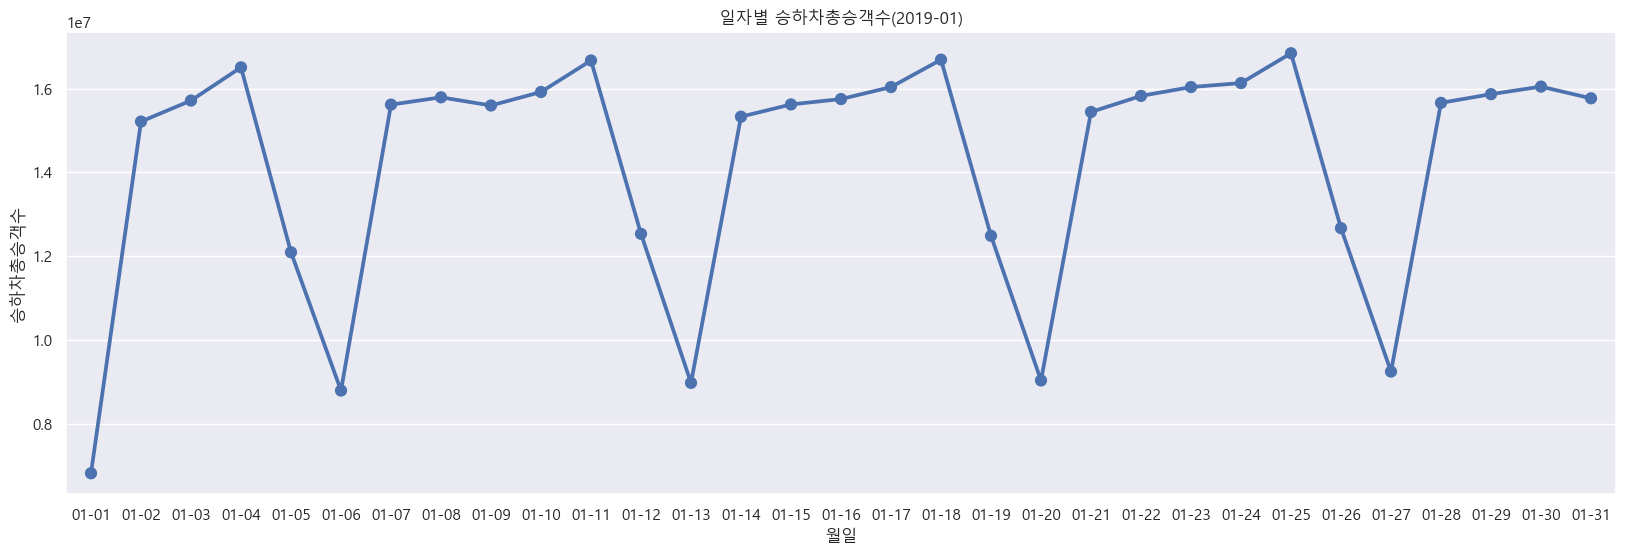

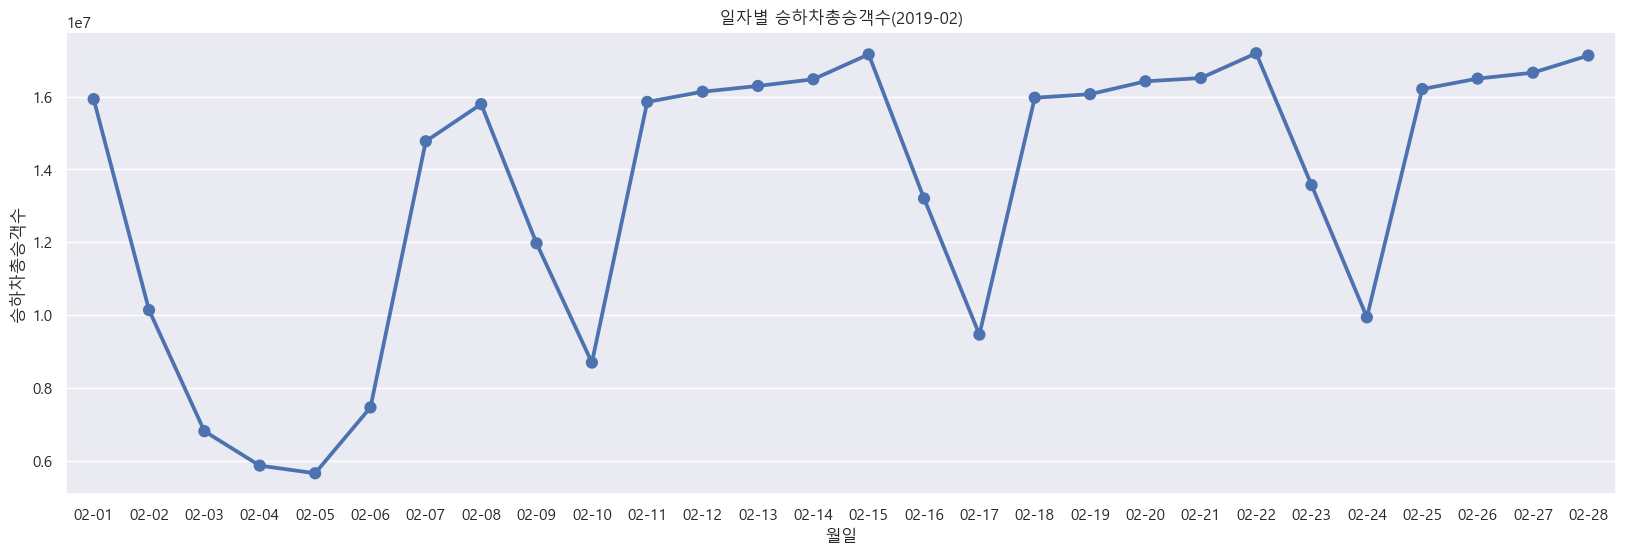

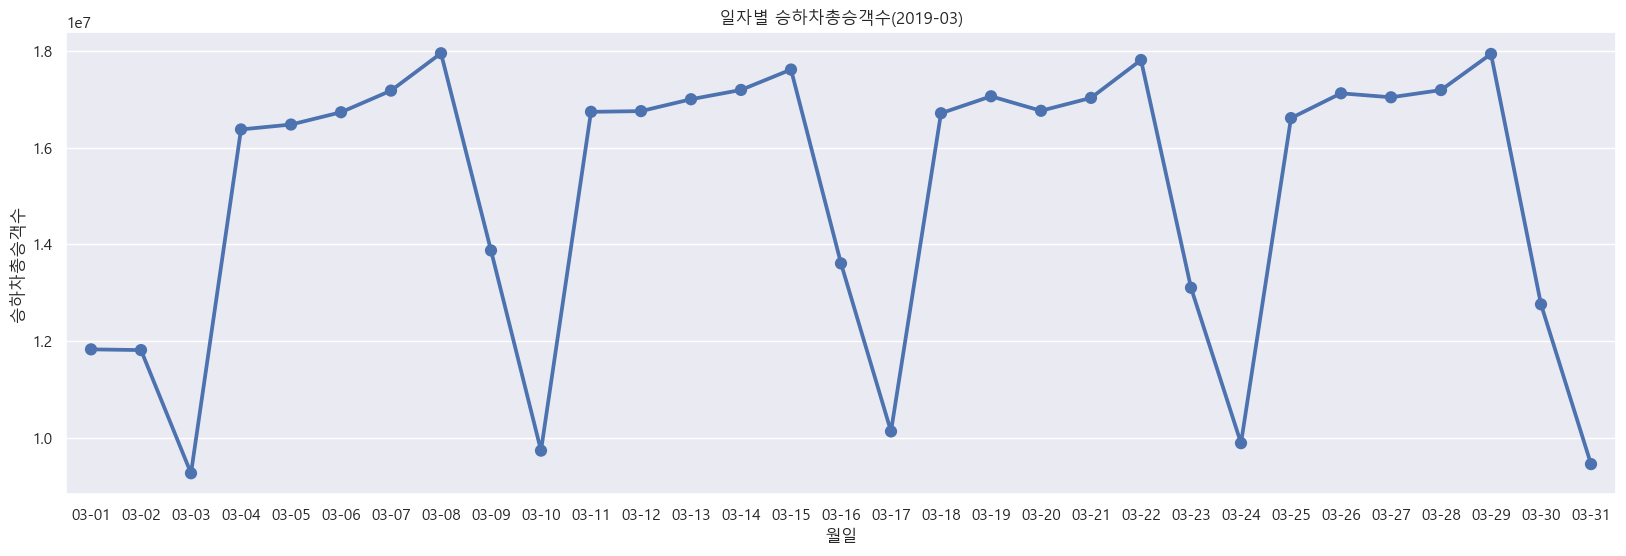

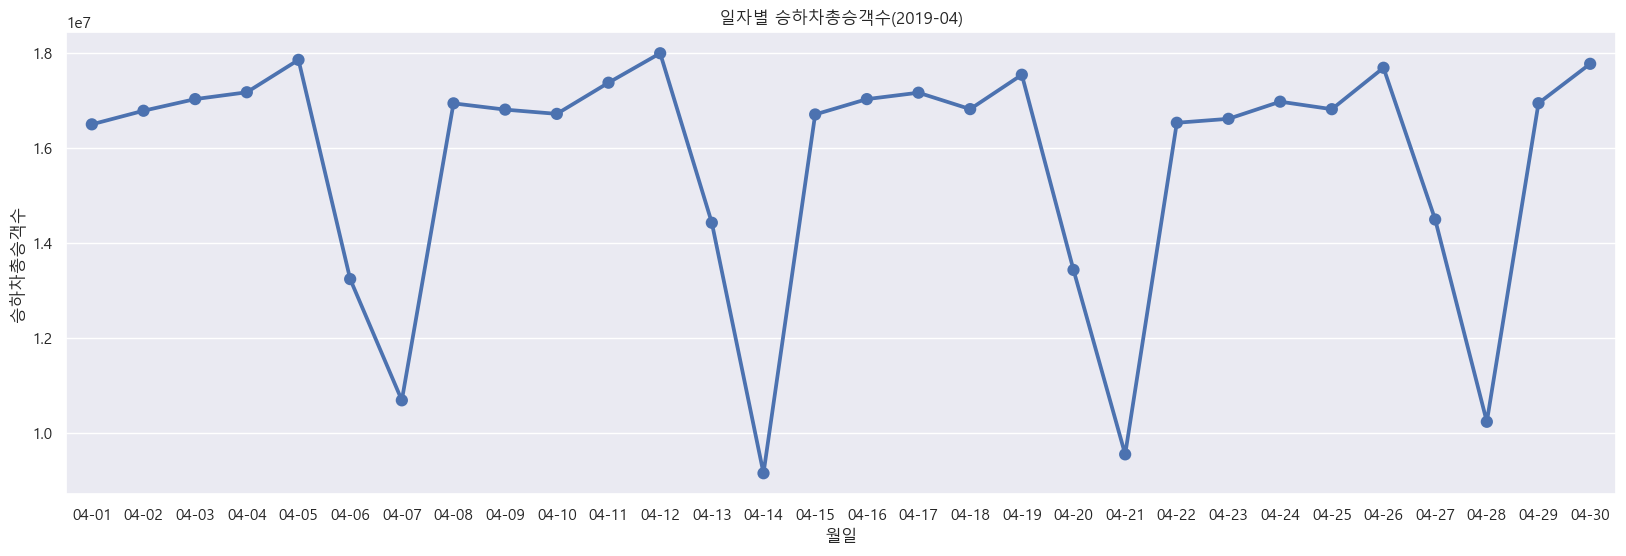

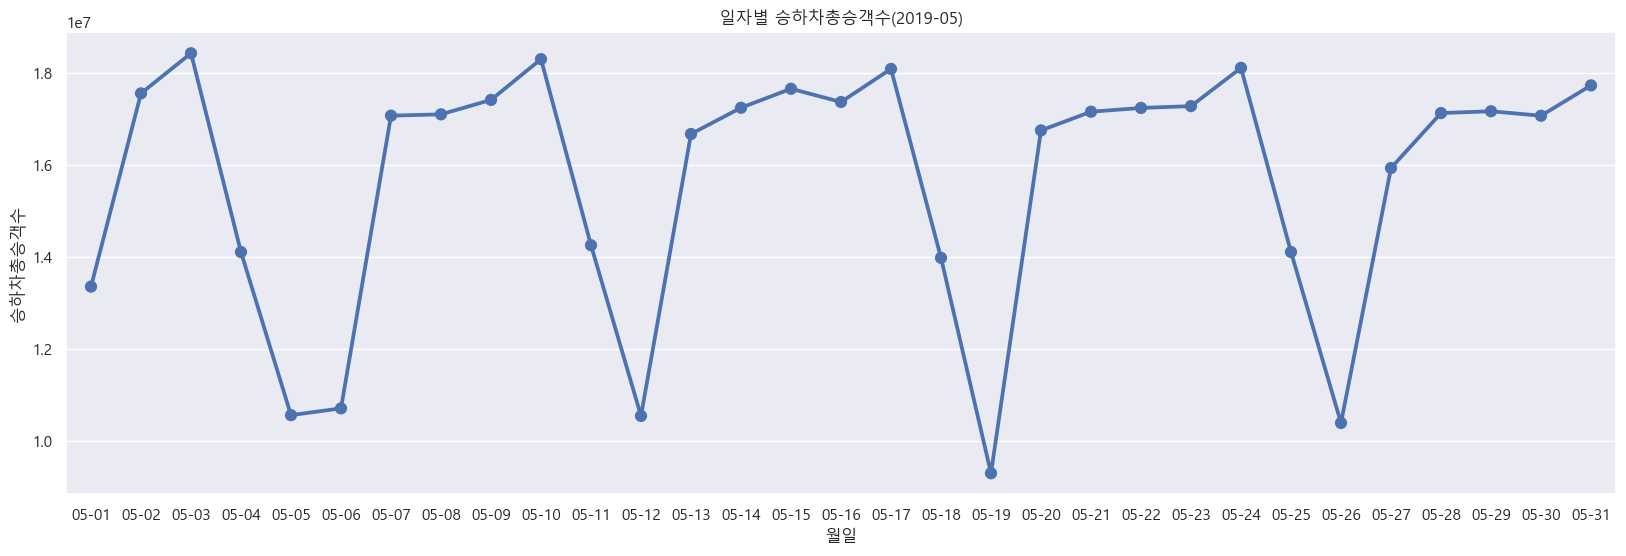

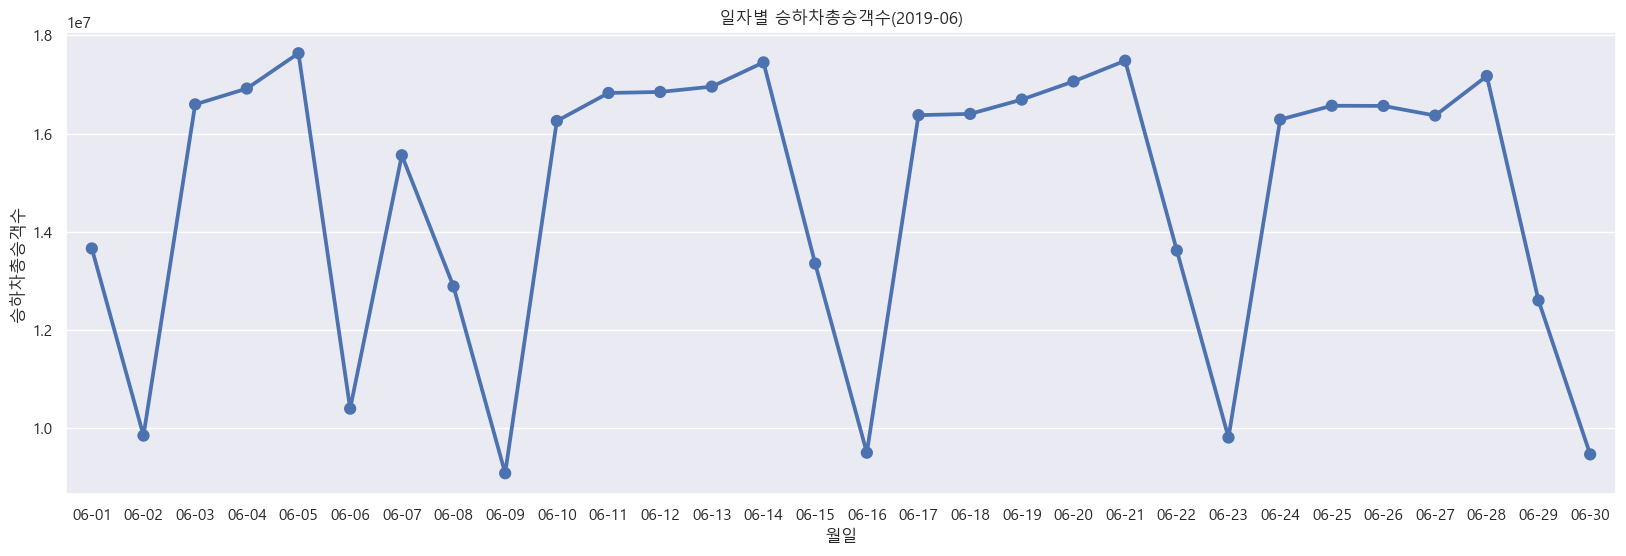

In [40]:
for yearmonth in raw['연월'].unique():
    df_selected=raw[raw['연월'] == yearmonth]
    df_pivot = pd.pivot_table(df_selected, index = ['월일'], values = '승하차총승객수', aggfunc= 'sum')
    df_pivot = df_pivot.reset_index()
    
# 그래프 그리기
    fig, ax = plt.subplots( figsize = (20,6) )
    ax.set_title(f'일자별 승하차총승객수({yearmonth})')  # 그래프 제목 추가하기
    sns.pointplot(data = df_pivot, x = '월일', y = '승하차총승객수')

# Q) 가장 승객이 많이 타는 승차역은?

In [41]:
station = raw.pivot_table(index = '역명', values = '승하차총승객수', aggfunc='sum')
station = station.sort_values(by = '승하차총승객수', ascending = False)
station.head()

,승하차총승객수
역명,
잠실,36964397.0
강남,36618233.0
홍대입구,35593444.0
고속터미널,35302636.0
서울역,34305342.0


-> 잠실

# Q) 노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)

In [42]:
#노선명 확인
raw['노선명'].unique()

array(['2호선', '3호선', '6호선', '경의선', '1호선', '4호선', '7호선', '분당선', '인천선',
       '경춘선', '수인선', '신분당선', '경강선', '5호선', '8호선', '9호선', '인천2호선', '공항철도',
       '우이신설경전철'], dtype=object)

In [43]:
# N호선만 추출 (1 ~ 9 )
line_list = []
for line in raw['노선명'].unique():
    if line[1:] == '호선':
        line_list.append(line)
sorted(line_list)

['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

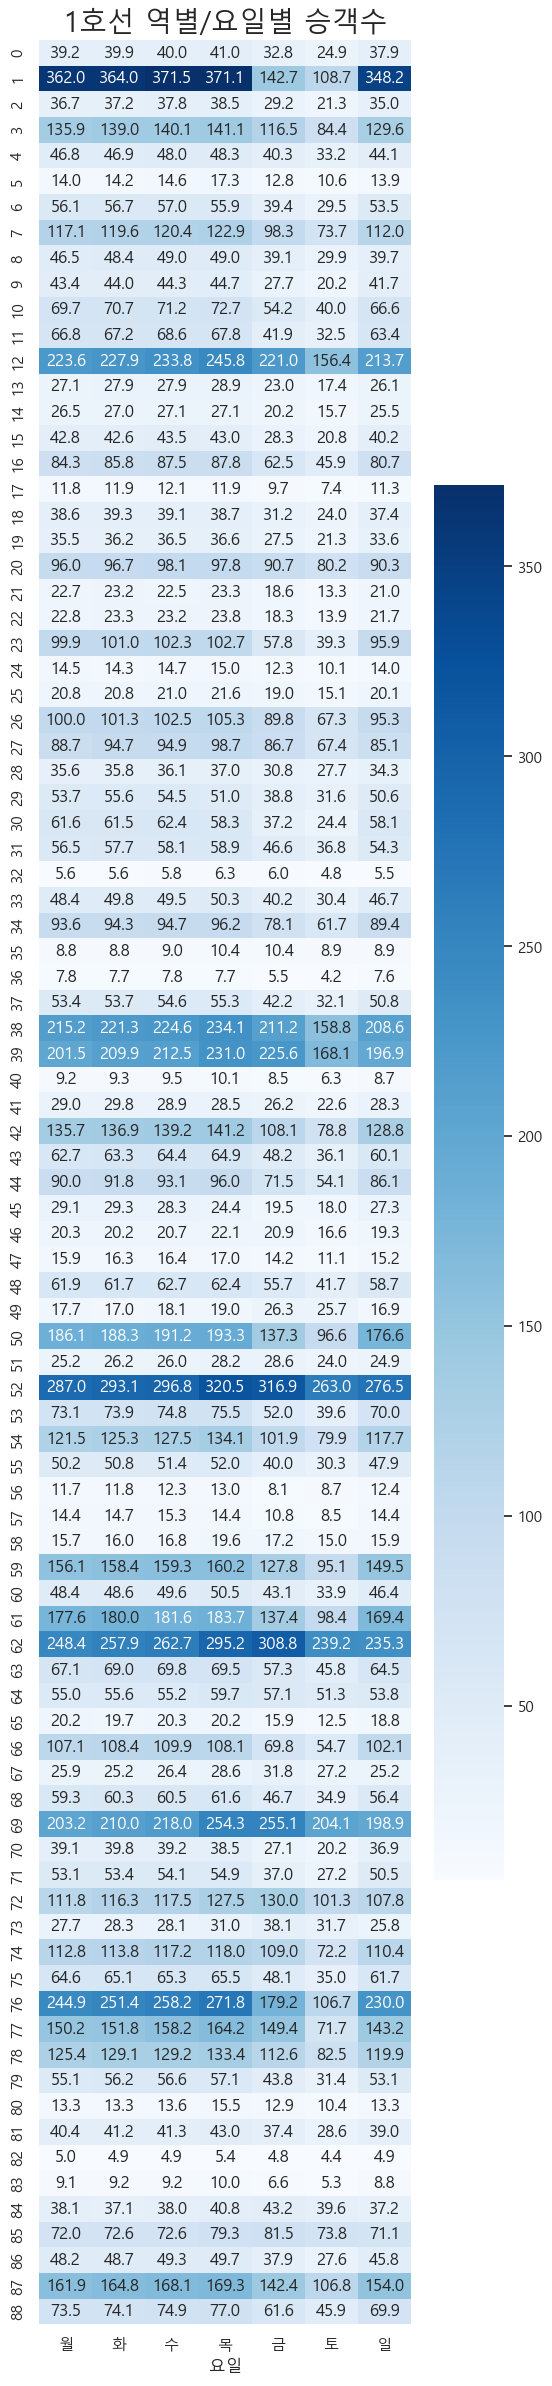

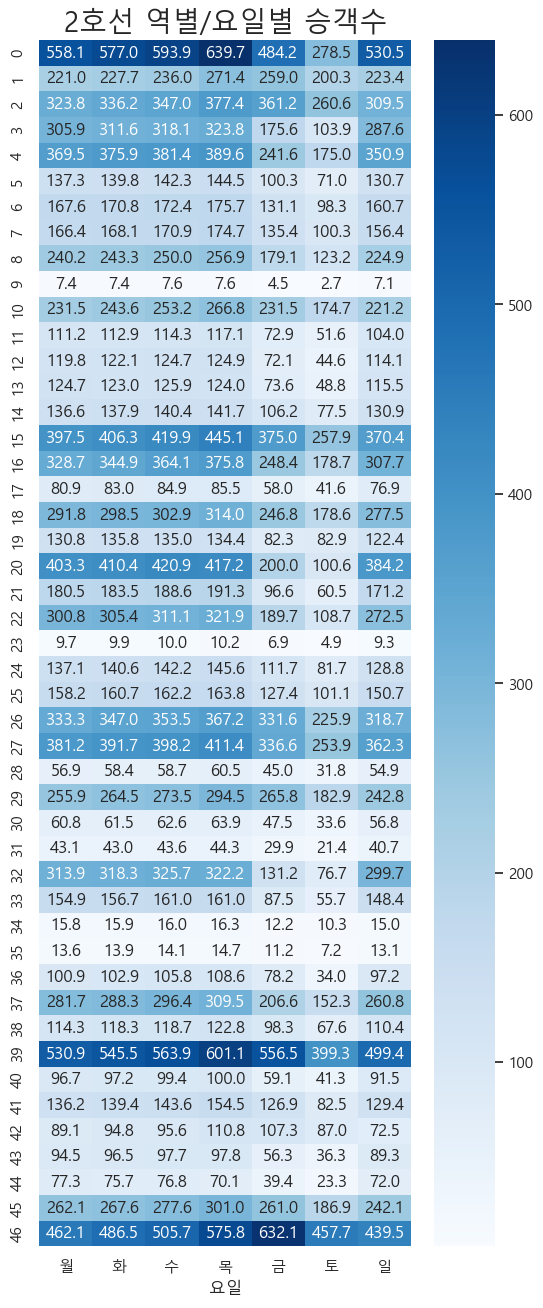

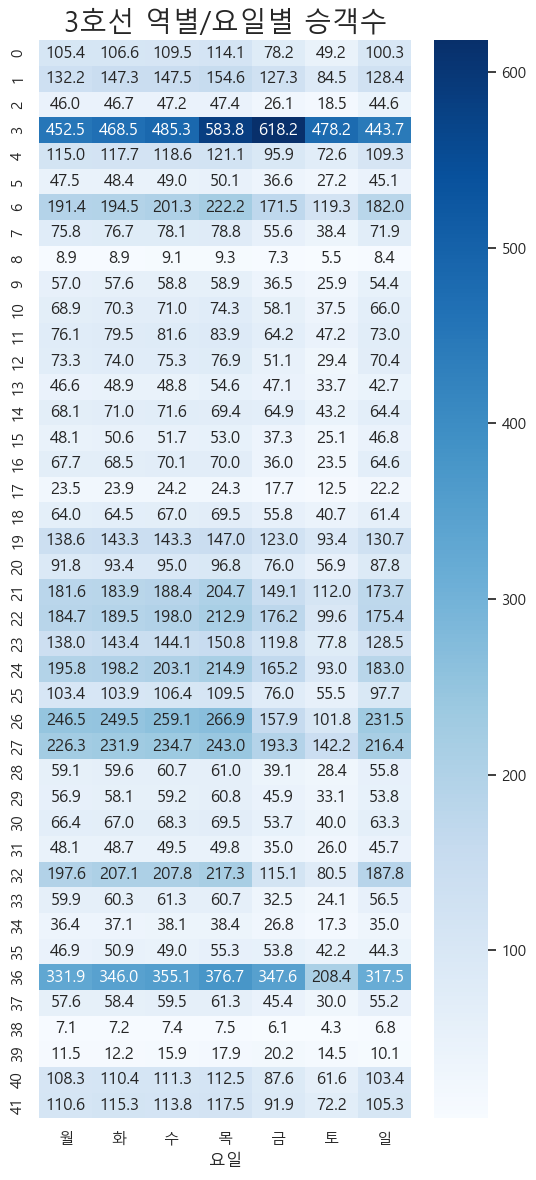

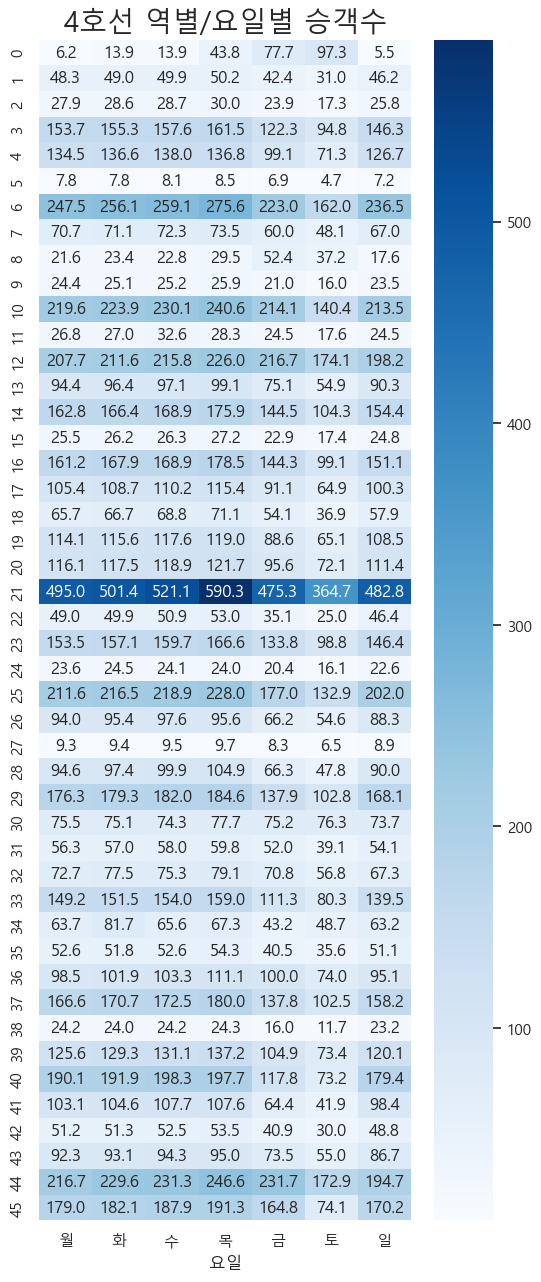

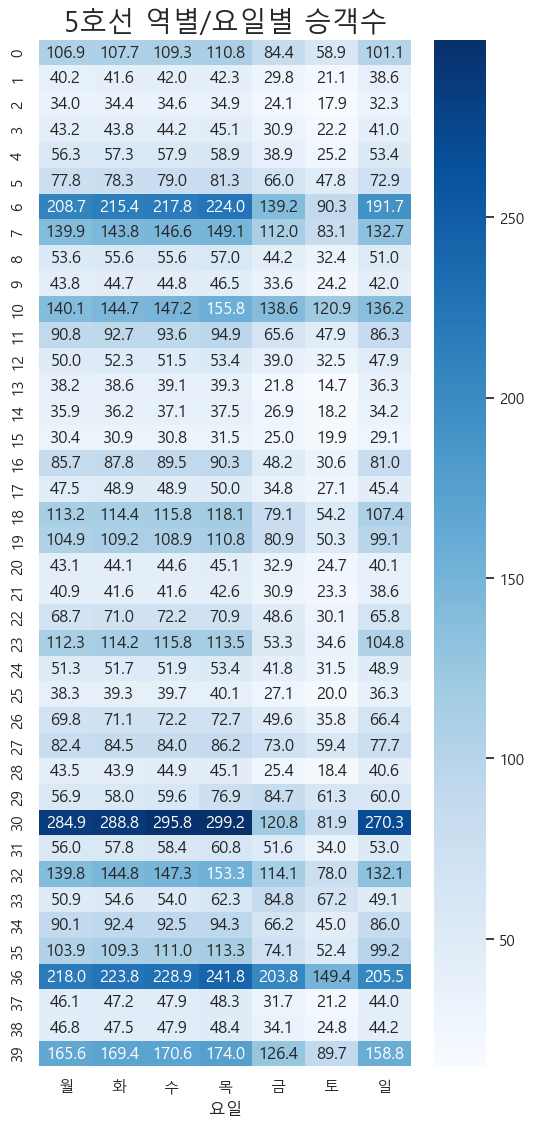

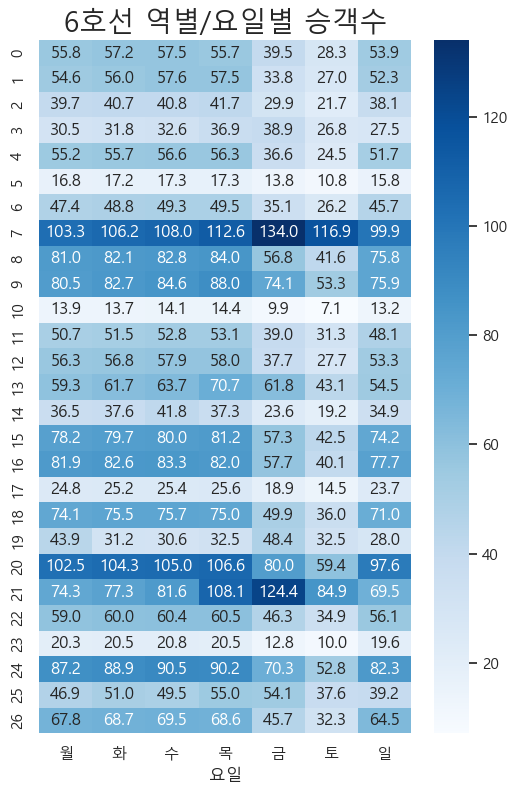

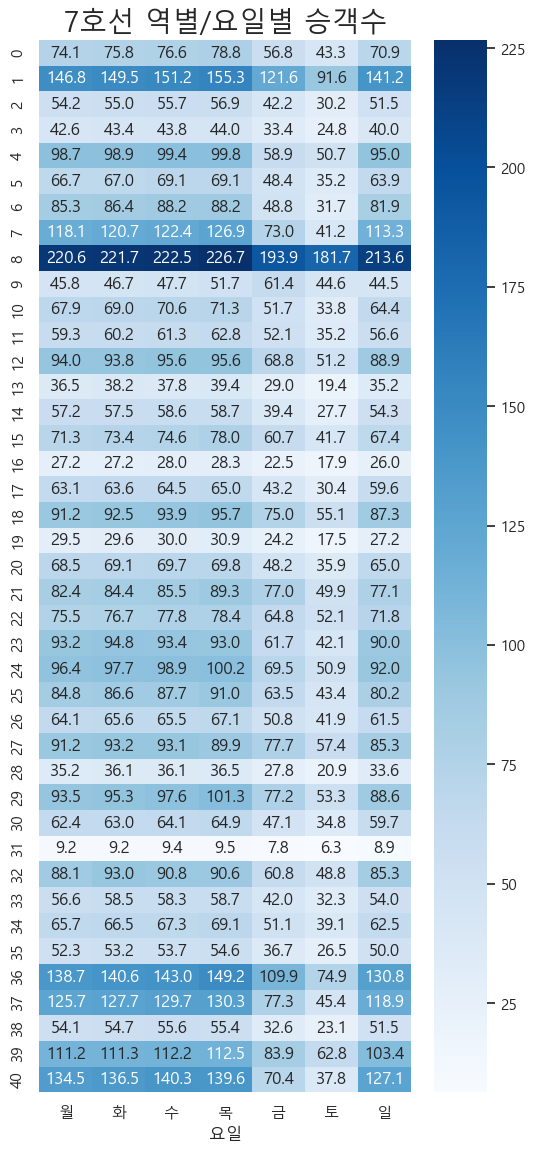

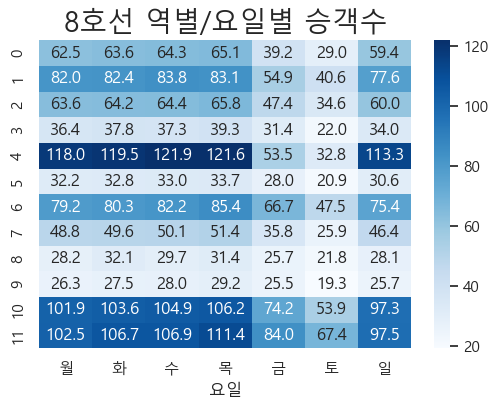

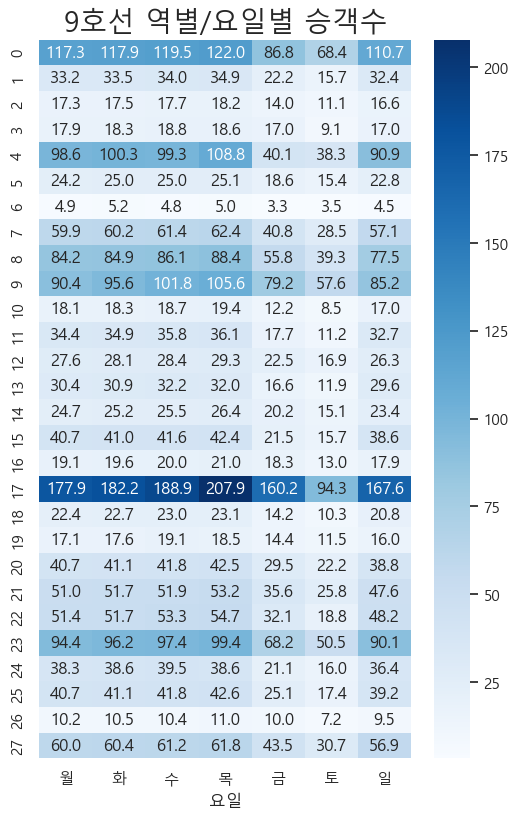

In [44]:
for line in sorted(line_list):
    df_selected=raw[raw['노선명'] == line]
    df_pivot = pd.pivot_table(df_selected, index = ['역명'],  columns = '요일', values = '승하차총승객수', aggfunc= 'sum')
    df_pivot = df_pivot.reset_index()
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    
    # 만명단위로 표현하기 위해 데이터프레임 전체를 1만으로 나누기
    df_pivot = df_pivot / 10000

# 그래프 그리기   
    fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) ) # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현
    plt.title(f"{line} 역별/요일별 승객수", fontsize = 20)
    sns.heatmap(data = df_pivot,cmap = "Blues", annot = True, fmt = '.1f')
    

In [54]:
df_pivot

요일,월,화,수,목,금,토,일
0,117.2928,117.8952,119.5416,122.0270,86.8047,68.4440,110.7119
1,33.1501,33.5420,34.0275,34.8898,22.2416,15.7199,32.3785
2,17.2991,17.4903,17.7346,18.2395,13.9564,11.1414,16.5974
3,17.8529,18.2656,18.7517,18.6267,17.0230,9.1108,16.9922
4,98.5908,100.2863,99.3216,108.7892,40.0890,38.2608,90.9172
5,24.2208,24.9568,24.9551,25.1362,18.6457,15.3750,22.8223
6,4.8613,5.2317,4.8150,4.9926,3.3039,3.4510,4.5103
7,59.8811,60.1994,61.3712,62.4087,40.7677,28.5035,57.1467
8,84.1544,84.8818,86.0918,88.3976,55.8091,39.2910,77.5079
9,90.3876,95.6067,101.7817,105.6051,79.1637,57.5545,85.1570


# Q) 1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [45]:
grouped = raw.groupby('노선명')
group_1line = grouped.get_group('1호선')
group_1line.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
6,2019-01-01,월,1호선,제기동,10187.0,10178.0,20365.0,2019-01,01-01,20190104
7,2019-01-01,월,1호선,신설동,6832.0,6930.0,13762.0,2019-01,01-01,20190104
9,2019-01-01,월,1호선,종로5가,13578.0,13282.0,26860.0,2019-01,01-01,20190104
10,2019-01-01,월,1호선,종각,20944.0,16658.0,37602.0,2019-01,01-01,20190104
52,2019-01-01,월,1호선,신설동,2525.0,2197.0,4722.0,2019-01,01-01,20190104


In [46]:
get_off = group_1line.groupby('역명')['하차총승객수'].agg([sum])
get_off

,sum
역명,
가능,1237540.0
가산디지털단지,10571381.0
간석,1147764.0
개봉,4426314.0
관악,1497683.0
...,...
천안,1314103.0
평택,2596456.0
화서,1520118.0


In [47]:
get_off.sort_values(by = 'sum', ascending=False)

,sum
역명,
가산디지털단지,10571381.0
수원,10226609.0
영등포,9432067.0
용산,7817685.0
노량진,7603258.0
...,...
서동탄,287651.0
진위,271336.0
봉명,238683.0


# Q) 2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [48]:
import folium
from folium.plugins import MarkerCluster

In [49]:
map_file = r'.\mapfile\지하철노선위경도정보2.csv'

In [50]:
map_df = pd.read_csv(map_file)
map_df.rename(columns = {'역이름' : '역명'}, inplace = True)
map_df.rename(columns = {'호선' : '노선명'}, inplace = True)

group2 = map_df.groupby('노선명')
group_2line_map = group2.get_group('2호선')

group_2line_map

,역명,역지역,위도,경도,노선명
0,낙성대,수도권,37.477090,126.963506,2호선
2,서울대입구,수도권,37.481285,126.952695,2호선
7,강변,수도권,37.535118,127.094723,2호선
8,영등포구청,수도권,37.525831,126.896668,2호선
10,잠실새내,수도권,37.511608,127.086301,2호선
...,...,...,...,...,...
898,용산역 대구2호,대구,35.849060,128.528804,2호선
899,이곡,대구,35.850595,128.515794,2호선
900,임당,대구,35.834118,128.740837,2호선
901,정평,대구,35.834041,128.728662,2호선


In [51]:
grouped = raw.groupby('노선명')
group_2line = grouped.get_group('2호선')
group_2line.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
11,2019-01-01,월,2호선,동대문역사문화공원,10995.0,11808.0,22803.0,2019-01,01-01,20190104
12,2019-01-01,월,2호선,신당,6811.0,7324.0,14135.0,2019-01,01-01,20190104


In [52]:
get_on = group_2line.groupby('역명')['승차총승객수'].agg([sum])
get_on.head()

,sum
역명,
강남,18148024.0
강변,8267462.0
건대입구,11123655.0
교대,9156484.0
구로디지털단지,11421335.0


In [53]:
result = pd.merge(get_on, group_2line_map, how='outer',on='역명')

result = result.sort_values(by = 'sum', ascending = False)

result

,역명,sum,역지역,위도,경도,노선명
39,잠실,18574323.0,수도권,37.513309,127.100215,2호선
0,강남,18148024.0,수도권,37.498085,127.027978,2호선
46,홍대입구,17270084.0,수도권,37.556864,126.923765,2호선
15,사당,13294251.0,수도권,37.476553,126.981549,2호선
27,신림,12831374.0,수도권,37.484264,126.929741,2호선
...,...,...,...,...,...,...
118,용산역 대구2호,NaN,대구,35.849060,128.528804,2호선
119,이곡,NaN,대구,35.850595,128.515794,2호선
120,임당,NaN,대구,35.834118,128.740837,2호선
121,정평,NaN,대구,35.834041,128.728662,2호선
